## Part 1 implementing QAOA


### Question1 :
Write down in the cell below the Hamiltonian whose ground state is the solution to MaxCUT on an input graph $G=(V,E)$:

$$ H = \sum_{i,j\in E} \sigma_i \cdot \sigma_j $$

### Question 2:
Complete the implementation below of a simple, brute-force enumeration of all states computing the optimal solution to MaxCUT for the graph represented by 'edges'

In [6]:

import numpy as np
from qat.lang.AQASM import Program, H,  AbstractGate, QRoutine, CNOT, RZ, S
from scipy import linalg # for linalg.expm, the matrix exponential.
from qat.qpus import get_default_qpu # numerical simulator for small quantum circuits.
import matplotlib.pylab as plt

graph1 = [(0,1),(0,2),(1,3),(2,3)]
graph2 = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,6),(4,7),(5,8),(3,4),(4,5),(6,7),(7,8)]
graph3 = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,6),(4,7),(3,4),(4,5),(6,7)]
graph4 = [(0,1),(1,2),(2,3),(4,5),(5,6),(6,7),(0,4),(1,5),(2,6),(3,7)]
graph5 = [(0,1),(0,2),(1,3),(2,4),(3,5),(4,5),(1,4)]
graph6 = [(0,1),(0,2),(1,3),(2,4),(1,4)]


# choice of graph
edges = graph6

nqubits = max([max(list(v)) for v in edges])+1

#nqubits = 5
graph7 = [(i,(i+1)%nqubits) for i in range(nqubits)]+[(1,4)]


# COMPUTATION OF OPT.
best_value = len(edges)
best_b = 0
for x in range(2**nqubits):
    b = np.binary_repr(x, width=nqubits)
    b = [int(b[i]) for i in range(nqubits)]
    # TODO: Complete the computation below:
    val=0
    for (i,j) in edges:
       if b[i]==b[j]:
         val+=1
       else:
         val=val-1
    # END TODO
    if val <= best_value:
        best_value = val
        best_b = b
print(best_value)
print(best_b)

-5
[1, 0, 0, 1, 1]


#### visualization of the graph

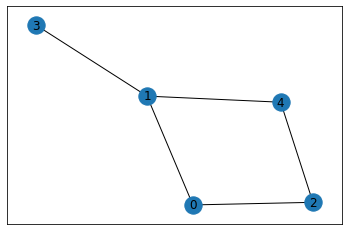

In [2]:
import networkx as nx
G = nx.Graph()
for i,j in edges:
    G.add_edge(i,j)
nx.draw_networkx(G)

In [4]:

import numpy as np
from qat.lang.AQASM import Program, H, CNOT, RX, QRoutine, RZ, X, Z

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.14).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.8/dist-packages/qat/magics/install.py", line 25, in <module>
    install_qlm_magics()
  File "install.py", line 72, in qat.core.magic.install.install_qlm_magics
F

In [5]:
def U_ZZ(theta):
    
    zz_r = QRoutine()
    zz_r.apply(CNOT, 0, 1)
    zz_r.apply(RZ(theta), 1) # difference of convention between implemented version and what we need.
    zz_r.apply(CNOT, 0, 1)

    return zz_r

### Question 3

In [19]:
def U_ZZ(theta):
    
    zz_r = QRoutine()
    zz_r.apply(CNOT, 0, 1)
    zz_r.apply(RZ(theta), 1) # difference of convention between implemented version and what we need.
    zz_r.apply(CNOT, 0, 1)

    return zz_r
    
def one_qaoa_layer(n_qubits, edges, theta, beta):
    from qat.lang.AQASM import Program, H, CNOT, RX, QRoutine, RZ, X, Z
    layer = QRoutine()
    #TODO: implement one qaoa layer
    for i in range(n_qubits):
      layer.apply(RX(theta), i)
    for q in edges:
      layer.apply(U_ZZ(beta), q)
        
    return layer

### Question 4

In [22]:

import numpy as np
from qat.lang.AQASM import Program, H,  AbstractGate, QRoutine, CNOT, RZ, S
from qat.qpus import get_default_qpu

def evaluate_parameters(n_qubits, edges, parameters, n_layers):
    
    prog = Program()
    qubits = prog.qalloc(n_qubits)
    
    # TODO: implement initialization+parameterized circuit

    for i in range(0, n_qubits):
        prog.apply(H, qubits[i])

    for p in range(n_layers):
        prog.apply(one_qaoa_layer(n_qubits, edges, parameters[2*p], parameters[2*p+1]),qubits)


      # END TODO
    circ = prog.to_circ()
    
    job = circ.to_job()
    qpu = get_default_qpu()
    
    result = qpu.submit(job)
    
    # BEGIN TODO
    obs = 0
    for sample in result:
        # this loop is over all 2**nqubits states.
        # sample.state.bitstring contains the qubit values (nqubits 0 or 1)
        bit=sample.state.bitstring
        val=0
        for i,j in edges:
          if bit[i]==bit[j]:
            val+=1
          else:
            val+=-1
        val=val*sample.probability
        obs+=val

    # END TODO
    return obs
    
        

In [16]:
import numpy as np
np.random.random(3)

array([0.93373825, 0.6642395 , 0.85179852])

In [17]:
from scipy.optimize import minimize


### Random initialisation

### Question 5: 
réponse à la question: 9

-3.30897806902614 -3.7329572407640206 -3.880906185203035 -3.946923228806202 -4.034352978933196 -4.15732702191293 -4.296733768781471 -4.385181466142216 -4.480308687624606 -4.536885178183307 -4.584128660488891 -4.628876732469006 -4.67492063719086 -4.685398918592755 -4.694320340769463 -4.698018557690518 -4.701569555373599 -4.70322097867343 -4.704510157904352 -4.705560032485587 -4.706384449541957 -4.707428138193335 -4.708956172258544 -4.710749331189605 -4.711569086170669 -4.711963155045709 -4.712230473165283 -4.712251369721414 -4.712290875115574 -4.712365448886516 -4.712502052393168 -4.712736787447019 -4.713080792057967 -4.713298015362462 -4.713427268608658 -4.713530645242701 -4.713672006613707 -4.713875170747031 -4.714047625235652 -4.714123625401579 -4.714185107876872 -4.714200087726265 -4.71422584874716 -4.714267559866071 -4.7143250840932405 -4.714373613897721 -4.714447037321139 -4.714510004946557 -4.71453235688203 -4.714556607804046 -4.714596483087895 -4.714657501721798 -4.7146994371149

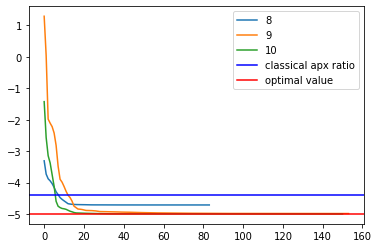

In [23]:
import matplotlib.pylab as plt


for nlayers in range(8,11,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       np.random.random(num_params),
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
# there exists a classical polynomial algorithm returning solutions within a factor of 0.878 of the optimal
# we must at least beat that. https://fr.wikipedia.org/wiki/Coupe_maximum
plt.axhline(0.878*best_value, color='b', label="classical apx ratio")
plt.axhline(best_value,color='r',label='optimal value')
plt.legend()

### Question 6: smart initialization

In [ ]:
T = 1.

for nlayers in range(3,6,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    # TODO implement parameter init
    parameters_init = []

    # END TODO        
    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       parameters_init, 
                       callback=print_avg,)
plt.axhline(0.878*best_value, color='b', label="classical apx ratio")
plt.axhline(best_value,color='r',label='optimal value')
plt.legend()